## #2: Trial-Averaged Firing Rate and Spike-Triggered Average - Luke Longren

Time to complete the exercise:

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import math

In [2]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (10,5)

## 1. Trial-Averaged Firing Rates:

### The file contains a matrix of spike times in milliseconds. The dimensions are [m x n], where m=100 is the maximum spike-time index and n=100 is the number of trials. Note: each trial has a different number of spikes, the remaining entries are filled with nan. The trial length is T = 5.5 s, the resolution is 0.1 ms

In [3]:
spike_times = np.loadtxt(r"C:\Users\lcube\Desktop\jupyter\BCCN\AAND\given\exercise2\SpikeTimes.dat")
print('Shape of the data:', np.shape(spike_times))

spike_times_seconds = np.dot(spike_times, 0.001)  # Converting to seconds

cleaned_spike_times = np.array([x for x in spike_times if str(x) != 'nan'])
cleaned_spike_times_seconds = np.array([x for x in spike_times_seconds if str(x) != 'nan'])

Shape of the data: (100, 100)


### (a) Make a raster plot using the pyplot function eventplot:

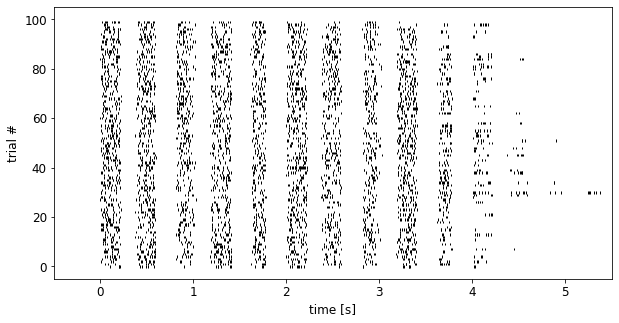

In [4]:
plt.eventplot(spike_times_seconds[:,:].T, orientation='horizontal', linewidths=1, colors='k')
plt.xlim(-0.5, 5.5)
plt.ylim(-5, 105)
plt.ylabel('trial #')
plt.xlabel('time [s]')
plt.show()

In [15]:
def spike_or_not(data, period, resolution): # converts spike time data into binary time points
    time_range = np.linspace(0, period, period//resolution)  # Create an array to put all the spike times into
    step = -1  # Start at -1, as we will initially add one and bring it to zero
    for i in time_range:  # Checks if the value exists in the raw spike train file
        step += 1
        if i in data:  # If the time value shows up in the data, make it to a one
            time_range[step] = 1
        else: 
            time_range[step] = 0  # Otherwise, make it a zero
    return time_range

### (b) Calculate and plot the trial-averaged firing rate using a sliding rectangular window with a width of 30, 90, and 200 ms. Compute the trial-averaged response function first and then convolve it with the rectangular window.

In [16]:
def trial_averaged_response(data, trial_number, period, width):
    points = int(period//width)
    count = np.zeros(points)
    response = np.zeros((trial_number, points))
    for i in range(trial_number):
        binary_spikes = spike_or_not(data[i], period, width)
        for j in range(points):
            for n in range(len(count)):
                if (n*width) <= binary_spikes[j] < (n*width + width):  # counts the spikes within the window
                    count[n] += 1  # raises bin value if time range fits
                else:
                    pass
            response[i,j] = count[n]
    sum_response = np.sum(response, axis=0)  # sum over trials
    avg_response = np.dot(sum_response, 1/trial_number)  # take average
    return avg_response

In [17]:
tar = trial_averaged_response(spike_times_seconds, 100, 5500, 10) # ran into issues here with run time, width value should be 0.1
print(np.shape(tar))

(550,)


In [18]:
# rectangular window and convolution from sheet #1
def rectangular_window(tau, dt):
    w = np.zeros(len(tau))
    for i in range(len(tau)):  # Writing out the piecewise function
        if -dt/2 <= tau[i] < dt/2:
            w[i] = 1/dt
        else:
            w[i] = 0
    return w

def rectangular_convolution(tau, data, bin_size):  # Here is the convolution, between the window and the data
    return np.convolve(rectangular_window(tau, bin_size), data, mode='same')

In [19]:
T = 5500  # period [s]
domain = np.linspace(-T/2, T/2, T//1)

In [20]:
def firing_rate_plot(function, modifier, bin_size):
    x = np.linspace(0, 5.5, len(function))  # Set x-axis manually in order to control scale
    normalized_function = function/(bin_size/1000) # Normalize to get value of spikes/s
    plt.plot(x, normalized_function, color='k') 
    plt.title('Trial-Averaged Firing Rate w/ '+str(modifier)+' = '+str(bin_size)+'ms')
    plt.ylabel('spikes per second')
    plt.xlabel('time [s]')
    plt.grid()
    plt.show()

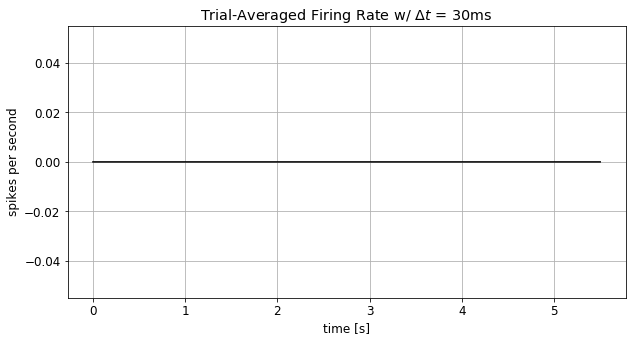

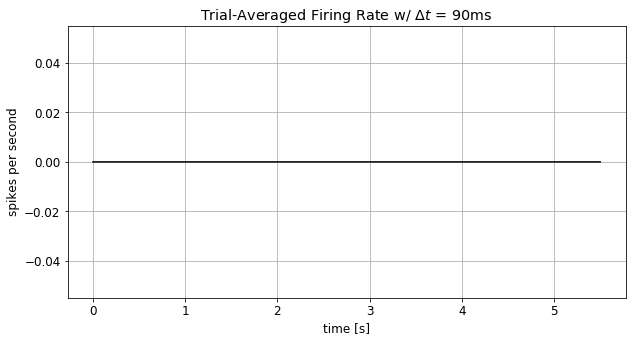

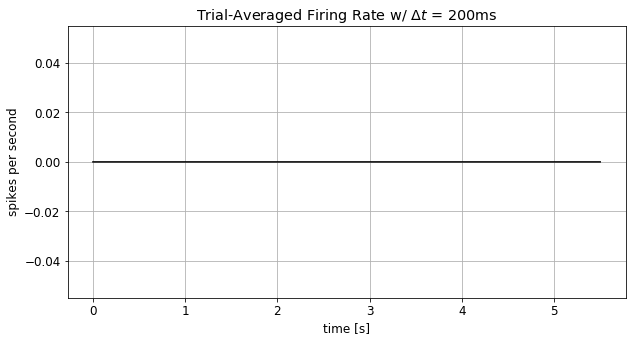

In [21]:
firing_rate_plot(function=rectangular_convolution(domain, tar, 30), modifier='$\Delta t$', bin_size=30)
firing_rate_plot(function=rectangular_convolution(domain, tar, 90), modifier='$\Delta t$', bin_size=90)
firing_rate_plot(function=rectangular_convolution(domain, tar, 200), modifier='$\Delta t$', bin_size=200)

### (c) Include different numbers of trials (10, 50, 100). Comment on your results.

In [22]:
def different_trial_number_plot(trials, bin_size):
    tar_1 = trial_averaged_response(spike_times, trials[0], 5.5, bin_size)
    tar_2 = trial_averaged_response(spike_times, trials[1], 5.5, bin_size)
    tar_3 = trial_averaged_response(spike_times, trials[2], 5.5, bin_size)
    
    T = 5500  # period [ms]
    domain = np.linspace(-T/2, T/2, T//0.1)
    conv_1 = rectangular_convolution(domain, tar, bin_size)
    conv_2 = rectangular_convolution(domain, tar, bin_size)
    conv_3 = rectangular_convolution(domain, tar, bin_size)
    
    x1 = np.linspace(0, 5.5, len(conv_1))  # Set x-axis manually in order to control scale
    x2 = np.linspace(0, 5.5, len(conv_2))
    x3 = np.linspace(0, 5.5, len(conv_3))
    
    fig, axes = plt.subplots(3)
    axes[0].plot(x1, conv_1, color='k', label=r'trial # = %i' %trials[0])
    axes[0].legend()
    axes[1].plot(x2, conv_2, color='k', label=r'trial # = %i' %trials[1])
    axes[1].legend()
    axes[2].plot(x3, conv_3, color='k', label=r'trial # = %i' %trials[2])
    axes[2].legend()
    
    fig.tight_layout()
    axes[0].set_title('Firing Rates')
    axes[0].set_ylabel('spikes/s')
    axes[1].set_ylabel('spikes/s')
    axes[2].set_ylabel('spikes/s')
    plt.xlabel('time [s]')
    plt.show()

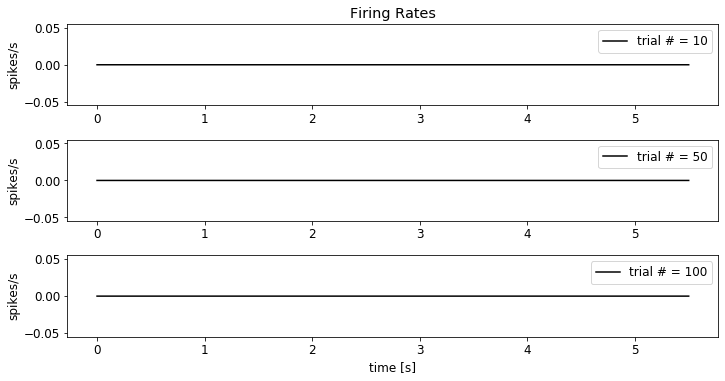

In [23]:
different_trial_number_plot(trials=[10, 50, 100], bin_size=200)

As you can probably tell, the results of my code got a bit jumbled and incomplete. It was working somewhat, at one point..

Based on my intuition however, changing the trial numbers would have an impact on the smoothness of the results. A lower trial number, such as 10, would have a more jagged response curve than the plot with 100 trials, for example. Increasing the number of trials leads to a smoother, likely more accurate, response result.

## 2. Spike-Triggered Average:

### The file contains the stimulus vector and the spikes times of a model neuron that was exposed to the stimulus for 100 trials. The trial length is T = 1 s, the time resolution is 0.1 ms.

### Calculate the spike-triggered average

## <font color=black> $ C(\tau) = \langle \frac{1}{n} \sum_{i=1}^{n} s \ (t_i - \tau) \rangle = \frac{1}{\langle n \rangle} \int_0^T dt \ \langle p(t) \rangle \ s(t-\tau)  $

### where s(t) is the stimulus, ρ(t) is the neural response function, and the angular brackets denote trial averages. Plot the spike-triggered average for 0 ≤ $\tau$ ≤ 50 ms.

###  Ensure that the STA is plotted according to the convention: $\tau$ positive and decreasing from left to right. 
### To compute the STA, you can either loop over the spike times $t_i$ (first expression) or use the numpy function correlate (second expression). Both procedures shall lead to approximately the same result. Which one is more efficient?

In [7]:
stimulus_vector = sio.loadmat(r"C:\Users\lcube\Desktop\jupyter\BCCN\AAND\given\exercise2\STA_data.mat")
print(sorted(stimulus_vector.keys()))
print(np.shape(stimulus_vector['SpikeTimes']))
print(np.shape(stimulus_vector['Stimulus']))
print(np.shape(stimulus_vector['__globals__']))
print(np.shape(stimulus_vector['__header__']))
print(np.shape(stimulus_vector['__version__']))

['SpikeTimes', 'Stimulus', '__globals__', '__header__', '__version__']
(744, 100)
(1, 10000)
(0,)
()
()


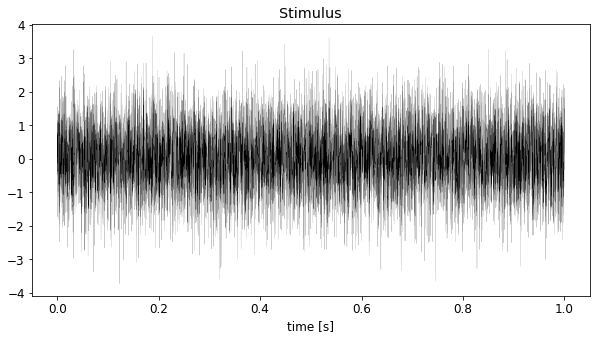

In [8]:
spike_times = stimulus_vector['SpikeTimes'].T
stimulus = stimulus_vector['Stimulus'][0]
t = np.linspace(0, 1, len(stimulus))
plt.plot(t, stimulus, linewidth=0.1, color='k')
plt.title('Stimulus')
plt.xlabel('time [s]')
plt.show()

Compute the STA by looping over spike times:

In [9]:
def STA_sum(stimulus, spiking_times):
    points = np.shape(spiking_times)[1]  # number of points per trial
    tau = np.linspace(0, 50, 500)  # [ms]
    C = np.zeros(500)
    for j in range(500):  # loop over tau
        arg = 0
        for i in range(100):  # loop over trials
            for n in range(points):  # loop over spike times
                arg += stimulus[n-j]
        C[j] = arg / points  # normalize
    return C

In [10]:
result_sum = STA_sum(stimulus=stimulus, spiking_times=spike_times)

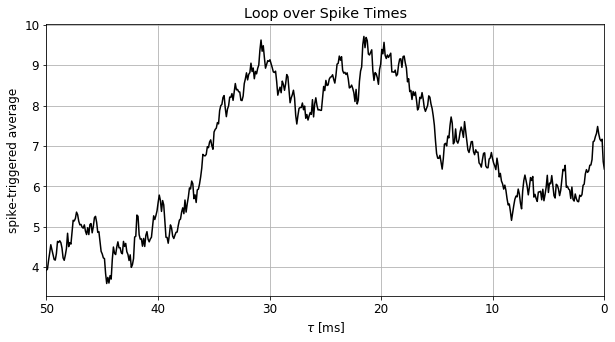

In [12]:
tau = np.linspace(0, 50, 500)  # [ms]
plt.plot(tau, result_sum, color='k')
plt.title('Loop over Spike Times')
plt.ylabel('spike-triggered average')
plt.xlabel(r'$\tau$ [ms]')
plt.xlim(50, 0)  # decreasing left to right
plt.grid()
plt.show()

Thinking about what result should be obtained here, the STA should always be positive and increasing as approaching a value of $\tau=0$, where it is the highest

Compute the STA by using numpy:

In [13]:
def STA_int(stimulus, spike_times):
    points = np.shape(spike_times)[1]  # number of points per trial
    tau = np.linspace(0, 50, 500)  # [ms]
    C = np.zeros(500)
    avg_response = trial_averaged_response(data=spike_times, trial_number=100, period=1, width=1)
    for j in range(500):  # loop over tau
        integral = np.correlate(avg_response, stimulus-j)
        C[j] = integral / points  # normalize
    return C

In [14]:
result_int = STA_int(stimulus=stimulus, spike_times=spike_times)

ValueError: setting an array element with a sequence.

In [ ]:
tau = np.linspace(0, 50, 500)  # [ms]
plt.plot(tau, result_int, color='k')
plt.title('Numpy Function Correlate')
plt.ylabel('spike-triggered average')
plt.xlabel(r'$\tau$ [ms]')
plt.xlim(50, 0)  # decreasing left to right
plt.grid()
plt.show()

Based upon my implimentation of these methods, the numpy implimentation should be more efficient.

However, this is dependent on how I have written the code. For the looping over spike times, I am only having to calculate for each $\tau$, trail, and spike time. For the correlate function, first the trail averaged neural response function has to be found at which point the correlate function can be used.

To summarize my work on this sheet, I ran into some problems with run times of the loops I'm using. This is something I will work towards in the future, learning to use matrix multiplication more which would then speed up the calculations. Also, I ran into some issues in my understanding of the trial-averaged firing rate. These roadblocks led me to get a bit confused, hopefully I was able to complete a few of the objectives successfully.